In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings

# Hides warning
warnings.filterwarnings('ignore') 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style

%matplotlib inline
np.random.seed(7) # seeding random number generator

In [19]:
# Loading Data

# Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
df = pd.read_csv("../data/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [21]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [22]:
# Find unique products based on 'name'
print("Total product names : {}".format( df['name'].count() ))
print("Total unique product names : {}\n".format( np.count_nonzero(df['name'].unique()) ))

print("Total product ASINs : {}".format( df['asins'].count() ))
print("Total unique product ASINs : {}".format( np.count_nonzero(df['asins'].unique()) ))

Total product names : 28332
Total unique product names : 65

Total product ASINs : 28332
Total unique product ASINs : 65


In [23]:
# We can see that there are a certain no of products based on unique 'name'


In [24]:
# Viewing the unique product 'name's

product_names = df['name'].unique()

print("product_names : {}".format((product_names)[:10])) # Show first 10 product_names

product_names : ['AmazonBasics AAA Performance Alkaline Batteries (36 Count)'
 'AmazonBasics Nylon CD/DVD Binder (400 Capacity)' 'Amazon Echo ‚Äì White'
 'Amazon Echo Show - Black' 'Echo Spot Pair Kit (Black)'
 'Fire TV Stick Streaming Media Player Pair Kit'
 'AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary'
 'AmazonBasics Ventilated Adjustable Laptop Stand'
 'AmazonBasics Backpack for Laptops up to 17-inches'
 'AmazonBasics 11.6-Inch Laptop Sleeve']


In [25]:
# Viewing the unique product 'asin's

product_ASINs = df['asins'].unique()

print("product_ASINs : {}".format(list(product_ASINs))) # Show all product_ASINS

product_ASINs : ['B00QWO9P0O,B00LH3DMUO', 'B00DIHVMEA,B00EZ1ZTV0', 'B01E6AO69U,B00L9EPT8O', 'B01J24C0TI', 'B073SQYXTW', 'B00ZV9RDKK', 'B00QWO9P0O,B01IB83NZG,B00MNV8E0C', 'B00WRDS8H0', 'B00EEBS9O0,B01CHQHIJK', 'B01B66989K,B00CD8ADKO,B00LA9H6UM', 'B00DUGZFWY', 'B00F5CKWBA,B00KPQCWAU', 'B0002LCUZK,B010CEC6MI,B01B25NN64', 'B074MCBG25,B075357QFB', 'B00QFQRELG', 'B006GWO7UA', 'B01L7XWEQQ', 'B006BGZJJ4', 'B00Y3QOH5G', 'B01BH83OOM', 'B00ZV9PXP2', 'B00NH144GK,B00LA9H1E8', 'B00OP6SMCI', 'B00BGIQS1A', 'B006LW0W5Y', 'B0751RGYJV', 'B00IOY8XWQ', 'B010RLCH2U', 'B01GAGYVU2', 'B0752151W6', 'B018SZT3BK,B01AHB9CN2', 'B018Y226XO', 'B01AHB9CYG', 'B01ACEKAJY', 'B00REQKWGA', 'B00IOYAM4I', 'B01IO618J8', 'B018Y22BI4', 'B01AHBBG04', 'B01AHBDCKQ', 'B00VINDBJK', 'B0189XZRTI,B0189XYY0Q,B0189XZ0KY', 'B01J94SWWU', 'B00QAVO43C', 'B06VTJWRJW', 'B00QAVNWSK', 'B01J94SCAM', 'B01J94SBEY', 'B01J94YIT6', 'B01J94T1Z2', 'B018Y224PY', 'B00VKTZFB4', 'B018Y225IA', 'B00ZS0G0PG', 'B06XD5YCKX', 'B018Y22C2Y', 'B01AHB9C1E', 'B018Y23M

In [26]:
# View the product names of a random ASIN

random_ASIN = 1
df[ df['asins'] == product_ASINs[random_ASIN] ]

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...
8346,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...


In [27]:
# ASIN is unique for similar products. We shall use ASIN to differentiate the product catagories

In [28]:
# View names of all products by grouping by product_ASINS.
 
print("ASIN \t\t\t Instances in group  \t Product name")
print('-'*80)

for group, frame in df.groupby(['asins']):
    name_list = list(frame['name'])
    name_list = list(map(str, name_list))
    name_list = [x for x in name_list if x!='nan']
    if len(name_list)>0:
        print("{} \t\t {} \t\t\t {} ".format(group , len(name_list),  name_list[0].split(',')[0][:30]))

ASIN 			 Instances in group  	 Product name
--------------------------------------------------------------------------------
B0002LCUZK,B010CEC6MI,B01B25NN64 		 9 			 Expanding Accordion File Folde 
B001NIZB5M 		 5 			 Amazon Kindle Replacement Powe 
B005OOKNP4 		 6 			 AmazonBasics Bluetooth Keyboar 
B006BGZJJ4 		 9 			 Amazon Kindle Charger Power Ad 
B006GWO7UA 		 5 			 Kindle PowerFast International 
B006LW0W5Y 		 5 			 AmazonBasics 16-Gauge Speaker  
B00BGIQS1A 		 4 			 Oem Amazon Kindle Power Usb Ad 
B00DIHVMEA,B00EZ1ZTV0 		 4 			 AmazonBasics Nylon CD/DVD Bind 
B00DUGZFWY 		 21 			 AmazonBasics 15.6-Inch Laptop  
B00EEBS9O0,B01CHQHIJK 		 25 			 AmazonBasics Backpack for Lapt 
B00F5CKWBA,B00KPQCWAU 		 6 			 AmazonBasics External Hard Dri 
B00IOY8XWQ 		 505 			 Kindle Voyage E-reader 
B00IOYAM4I 		 36 			 Kindle Voyage E-reader 
B00NH144GK,B00LA9H1E8 		 6 			 AmazonBasics USB 3.0 Cable - A 
B00OP6SMCI 		 1 			 Two Door Top Load Pet Kennel T 
B00QAVNWSK 		 2 			 AmazonBasics Double-

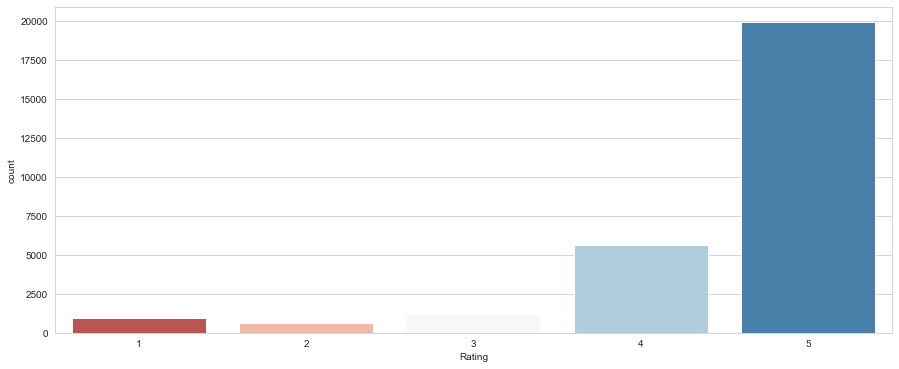

In [29]:
# Show distribution of review ratings

plt.figure(figsize=(15,6))
sns.countplot(x='reviews.rating', data=df, palette='RdBu')
plt.xlabel('Rating')
plt.show()

In [30]:
# Most ratings are of score 4 and 5

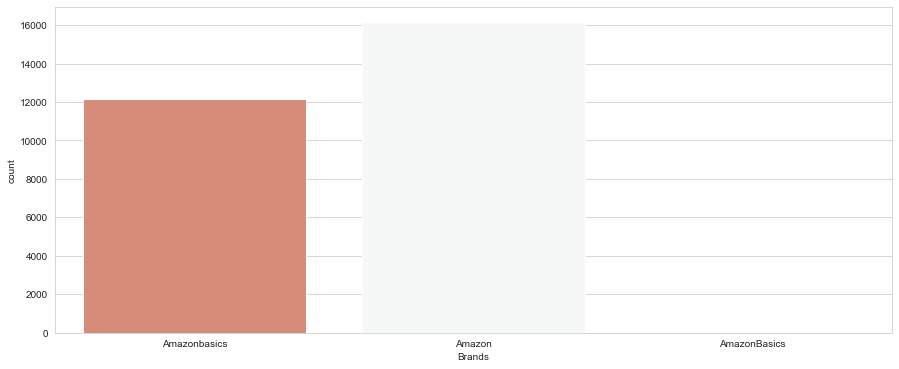

In [31]:
# Show distribution of Brand

plt.figure(figsize=(15,6))
sns.countplot(x='brand', data=df, palette='RdBu')
plt.xlabel('Brands')
plt.show()

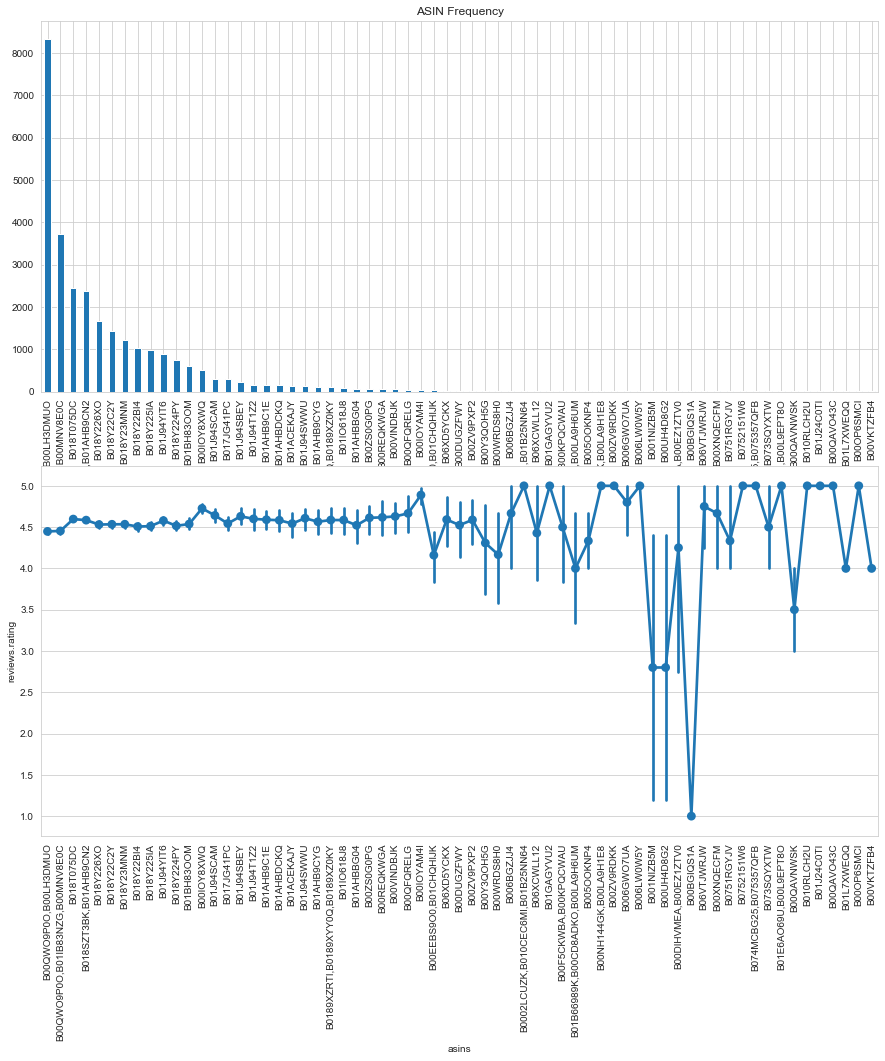

In [32]:
# Visualizing review rating per ASIN 
# Bar plot shows no. of reviews
# Point plot shows the rating and variance in the rating

asins_count_ix = df["asins"].value_counts().index
plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
df["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")

plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=df)

plt.xticks(rotation=90)
plt.show()

# Products with many reviews have rating with low variance 
# Products with few reviews have rating with high variance

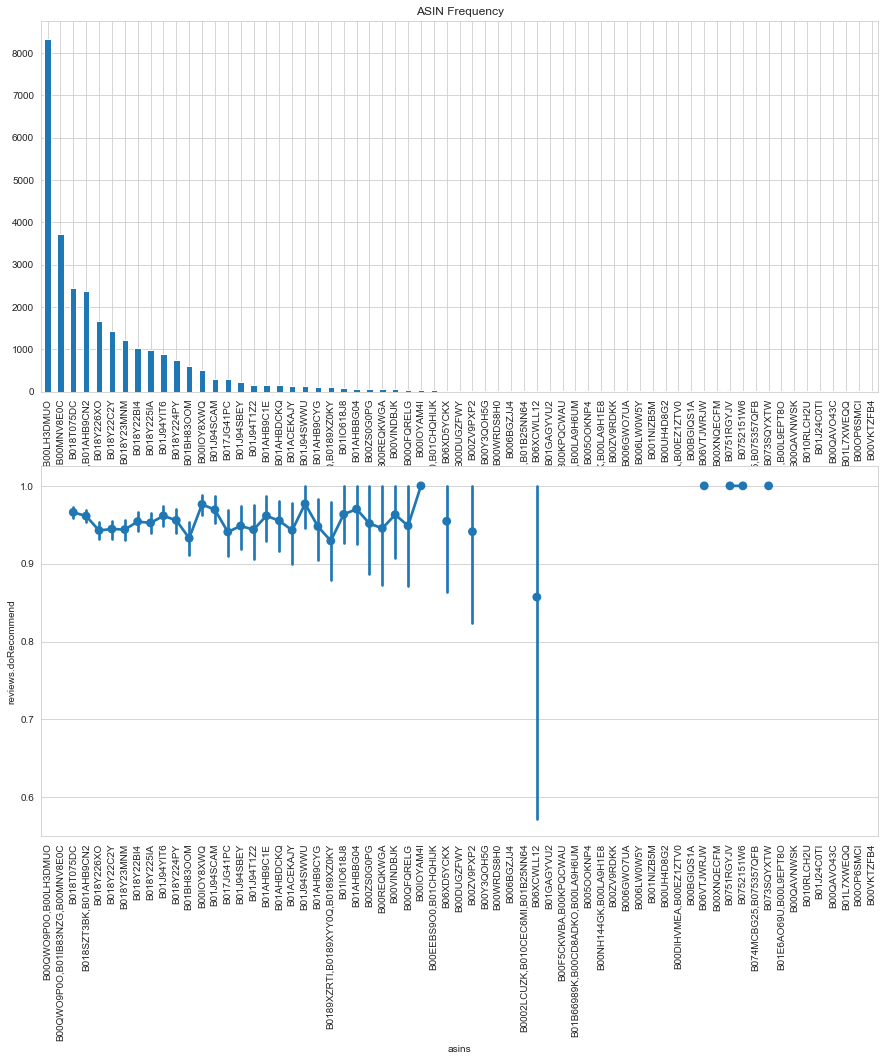

In [33]:
# Visualizing review doRecommend per ASIN 
# Bar plot shows no. of reviews
# Point plot shows the rating and variance in the rating

asins_count_ix = df["asins"].value_counts().index
plt.subplots(2,1,figsize=(15,15))

plt.subplot(2,1,1)
df["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")

plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=df)

plt.xticks(rotation=90)
plt.show()